In [2]:
import pandas as pd
import numpy as np

In [6]:
# Load original bin edges
ce_bin_edges = np.loadtxt('data/cross_entropy_bins.csv', delimiter=',')
fid_bin_edges = np.loadtxt('data/fidelity_bins.csv', delimiter=',')


In [15]:
len_ce = len(ce_bin_edges)
len_fid = len(fid_bin_edges)
print(len_ce, len_fid)

151 16


In [10]:
# Load data
df = pd.read_csv('results_5.csv')

#'Hist CrossEntropy' column
hist_ce = df['Hist CrossEntropy'].values
# now is an array of strings, each string being a numpy array of ints
hist_ce = np.array([np.fromstring(x[1:-1], sep=' ') for x in hist_ce])

#'Hist Fidelity' column
hist_fid = df['Hist Loss Fidelity'].values
# now is an array of strings, each string being a numpy array of ints
hist_fid = np.array([np.fromstring(x[1:-1], sep=' ') for x in hist_fid])


In [12]:
rows = len(hist_ce)
print('rows:', rows)

rows: 200


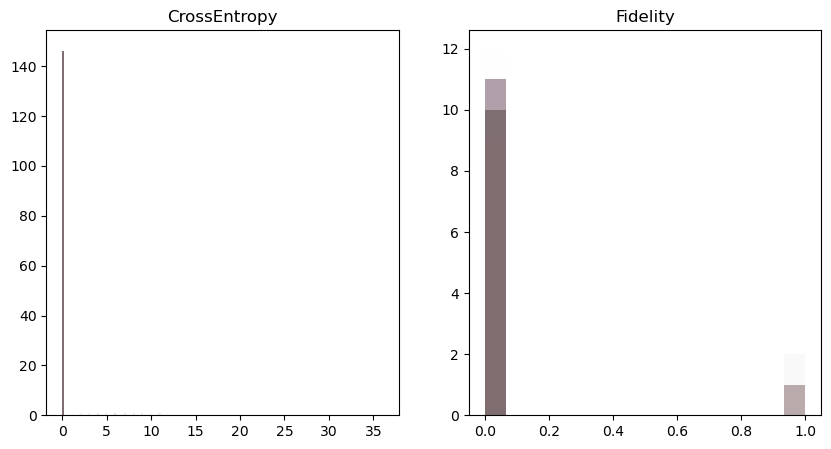

In [14]:
# Plot the histograms stacked for the rows with 1/rows alpha
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(rows):
    ax[0].hist(hist_ce[i], bins=ce_bin_edges, alpha=1/rows)
    ax[1].hist(hist_fid[i], bins=fid_bin_edges, alpha=1/rows)
ax[0].set_title('CrossEntropy')
ax[1].set_title('Fidelity')
plt.show()


In [13]:
# Plot the histograms (one per data row)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(rows, 2, figsize=(10, 5*rows))
for i in range(rows):
    axs[i, 0].hist(hist_ce[i], bins=ce_bin_edges, edgecolor='black')
    axs[i, 0].set_title('CrossEntropy Histogram')
    axs[i, 1].hist(hist_fid[i], bins=fid_bin_edges, edgecolor='black')
    axs[i, 1].set_title('Fidelity Histogram')
plt.tight_layout()
plt.show()